In [59]:
import pandas as pd

df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Encode categorical features + target
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Split features/labels
X = df.drop("class", axis=1)
y = df["class"]

### Try the train/test/split approach


In [70]:
# Try the train test split approach
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.9951


### Try cross-validation instead


In [62]:
import numpy as np
from sklearn.model_selection import cross_val_score

max_k = int(np.sqrt(len(df)))
cv_scores = []

for k in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    cv_scores.append(scores.mean())

best_k = np.argmax(cv_scores) + 1
best_score = np.max(cv_scores)

print(f"Best k: {best_k}, Best accuracy: {best_score:.4f}")

Best k: 1, Best accuracy: 0.9048


### Plot to see how value of K affects the CV accuracy


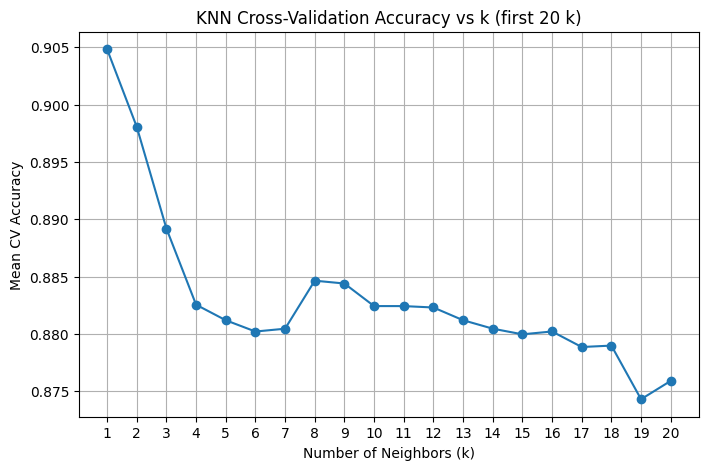

In [67]:
import matplotlib.pyplot as plt

k_values = range(1, 21)  # first 20 k values

plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores[:20], marker="o")  # take only first 20 scores
plt.title("KNN Cross-Validation Accuracy vs k (first 20 k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean CV Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [71]:
import numpy as np
from sklearn.model_selection import cross_val_score

max_k = int(np.sqrt(len(df)))

knn = KNeighborsClassifier(n_neighbors=8)
scores = cross_val_score(knn, X, y, cv=5)
cv_scores.append(scores.mean())

print(f"Best k: 8, Best accuracy: {scores.mean():.4f}")

Best k: 8, Best accuracy: 0.8846
